# Assignment1

# 0. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML 
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import *

df = pd.read_csv('sampled_data.csv',encoding='utf-8') 


EDA에 필요한 라이브러리를 불러오고 필요한 data를 불러왔습니다. 

In [2]:
df.head() #먼저 데이터를 확인합니다 .

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


각 변수가 의미하는 내용이 모두 다르게 나타났기 때문에 그 단위에 대해서도 모두 제각각인 분포를 보이고 있습니다.
따라서 용이한 로지스틱회 회귀를 위하여 변수에 대해서 스케일링을 진행하였습니다. 

In [3]:
scaler = StandardScaler() 
scaler.fit_transform(df)

array([[ 0.87599191,  1.10227326, -0.01383661, ..., -0.29889867,
        -0.34162683, -0.04276894],
       [ 0.46599202,  1.08762774, -0.04747727, ..., -0.19381068,
        -0.29798293, -0.04276894],
       [-1.4021752 ,  0.60496356,  0.12384231, ...,  0.08768119,
        -0.28521635, -0.04276894],
       ...,
       [-0.42810237, -1.77186915, -0.42136644, ..., -0.90645255,
         0.37580428, -0.04276894],
       [ 0.90608364,  0.67055034, -1.06901447, ...,  0.00759972,
         1.21623571, -0.04276894],
       [-1.90993121,  0.72058018, -0.22056932, ...,  0.07781589,
        -0.25934387, -0.04276894]])

In [4]:
df_new = pd.DataFrame(scaler.fit_transform(df), columns = df.columns) 
#이렇게 스케일링한 데이터를 df_new라는 이름으로 새로운 변수로 지정해 주었습니다.

타겟변수인 Class까지 스케일링이 되었기 때문에 따로 인코딩을 위한 함수를 만들어 원래의 0과 1로 변환해주었습니다.
스케일링 이후에도 분포는 변하지 않았기 때문에 크게 이상이 없다고 판단하였습니다. 

In [5]:
df_new.Class.value_counts()

-0.042769     28428
 23.381452       52
Name: Class, dtype: int64

In [6]:
def encoding (x):
    if x >= 1:
        return 1
    else:
        return 0
df_new.Class = df_new.Class.apply(encoding)

In [7]:
df_new.Class.value_counts()

0    28428
1       52
Name: Class, dtype: int64

Class를 따로 분리하는 작업을 진행하였습니다. 

In [8]:
Y= df_new.Class
#Class를 따로 분리하여 Y라는 이름으로 지정하였습니다. 

In [9]:
X = df_new.drop('Class',axis=1)
#df에서 Class를 제외하고 X라는 이름으로 지정하였습니다 .

In [10]:
#위에서 지정한 X,Y를 train set과 train set 0.7 : 0.3 비율로 분리하였습니다. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 1. 주어진 데이터(sampled_data.csv)에 대해 로지스틱 회귀모형(sklearn 패키지 사용 가능)을 적합해보고, Mean Accuracy 찍어보기
로지스틱 회귀분석을 시행하고 모델의 정확도를 확인해 보도록 하겠습니다. 

In [11]:
logreg = LogisticRegression().fit(X_train, y_train) #logreg라는 이름으로 로지스틱회귀를 만들고 적합하였습니다. 

In [12]:
y_pred = logreg.predict(X_test) # class에대해서 예측해 보도록하겠습니다. 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
logreg.predict_proba(X_test)

array([[9.99789408e-01, 2.10591918e-04],
       [9.99442572e-01, 5.57428081e-04],
       [9.99991006e-01, 8.99353963e-06],
       ...,
       [9.99694202e-01, 3.05797894e-04],
       [9.99731956e-01, 2.68043948e-04],
       [9.98939604e-01, 1.06039627e-03]])

In [14]:
logreg.score(X_test, y_test) # mean accuracy를 출력했을때 매우 높게 나타나는 것을 확인 할 수 있습니다.

0.9996488764044944

사기에 대한 데이터를 판단하고자 하였지만 사기인 경우(1에 대한 데이터)가 너무 적어 의미가 없다는 것으로 파악하였습니다. 
추가적으로 샘플링 작업(구글링을 통해 Smote이라는 방법을 통해 데이터를 늘려주는 방식이 있다는 것을 알게 되었습니다.)을 통해서 부분적으로 해결할 수 있을 것이라고 생각하였으나 능력부족으로 도입해보지는 못하였습니다. 
- Smote관련 링크: https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

# 2. Confusion Matrix 찍어보기 → Mean Accuracy와 비교
Counfusion Matrix에 진행하기 앞서, 우선 모델의 최적의 파라미터를 도출하고자 Grid Search를 진행해 보았습니다. 
c값을 1을 기준으로 패널티를 강하게 ~ 약하게 주어 확인해 보았습니다. 
패널티는 Ridge와 Lasso를 사용하였습니다. 

In [15]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']} # 파라메터에 대한 후보를 만들었습니다. 


grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) # 로지스틱회귀 그리드 서치를 진행하였습니다. 


X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=23)# 모델에 대한 최종 성능을 점검하였습니다.

grid_search.fit(X_train, y_train) #적합시킨후에
grid_search.score(X_test, y_test) #점수를 확인하였습니다. 
#Accuracy가 크게 차이나지 않는 것으로 나타났습니다. 

0.9987359550561797

In [16]:
print(confusion_matrix(grid_search.predict(X_test), y_test))
print(classification_report(grid_search.predict(X_test), y_test))
#f-1 score, matrix, #정확도, 재현율

[[7104    6]
 [   3    7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7110
           1       0.54      0.70      0.61        10

    accuracy                           1.00      7120
   macro avg       0.77      0.85      0.80      7120
weighted avg       1.00      1.00      1.00      7120



Confusion Matrix로 확인해본 결과
- 1) 사기가 아닌데, 사기가 아니라고 판단한 경우 = 7104 건
- 2) 사기가 아닌데, 사기라고 판단한 경우 = 6건
- 3) 사기인데, 사기가 아니라고 판단한 경우 = 3건
- 4) 사기인데, 사기라고 판단한 경우 = 7건으로 나타났습니다. 

- 5) Precision의 경우 0경우는 모두 맞췄고 1의 경우에는 0.54의 정밀도를 보였습니다. 
- 6) Recall의 경우는 0.7의 재현율을 보였습니다. 
- 7) 이를 통해 f1-score를 봤을때 0.61의 점수를 나타냈습니다. 

# 3. Logistic은 cut-off를 어떻게 설정하느냐에 따라 Classification의 성능이 달라짐. 
- 최적의 Cut-off를 ROC 커브를 사용해서 찾아보세요. 

In [17]:
predict_score = logreg.predict_proba(X_test)[:,1] #predict_proba를 통하여 Class가 1일 확률에 대해서 예측값을 확인해보도록 하겠습니다. 

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, predict_score )
# 순서대로 fpr, tpr, thresholds를 리턴함!
# fpr = 1-specificity
# tpr = sensitivity
# thresholds = 해당 fpr, tpr을 리턴할 때의 thesholds(cut-off) 값!

Text(0, 0.5, 'Sensitivity')

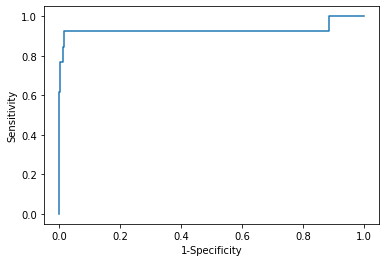

In [19]:
x = fpr
y = tpr

plt.plot(x,y)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
#ROC커브를 그렸을때 다음과 같은 분포를 보였습니다. 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

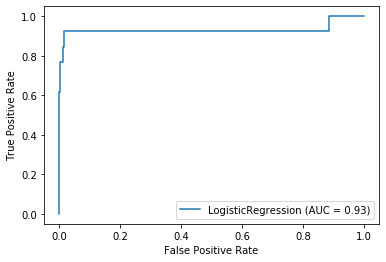

In [21]:
# sklearn 패키지를 활용하여 조금더 편하게 그릴수 있다는 것을 배웠습니다. 

plot_roc_curve(logreg, X_test, y_test, response_method = 'predict_proba') #method를 predict_proba로 하여 Roc_curve를 그렸습니다.

In [22]:
res = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
res
# 1-specificity, specificity,thresholds에 대한 정보를 얻을 수 있었습니다. 

[[0.0, 0.0, 1.9999993305286088],
 [0.0, 0.07692307692307693, 0.9999993305286089],
 [0.0, 0.23076923076923078, 0.9985317982931996],
 [0.0001407063458561981, 0.23076923076923078, 0.9871898509569165],
 [0.0001407063458561981, 0.46153846153846156, 0.7008586507269817],
 [0.0002814126917123962, 0.46153846153846156, 0.6545753487489591],
 [0.0002814126917123962, 0.5384615384615384, 0.5328227592313302],
 [0.00042211903756859433, 0.5384615384615384, 0.5053098029459365],
 [0.00042211903756859433, 0.6153846153846154, 0.3025078783013691],
 [0.0011256507668495849, 0.6153846153846154, 0.064299343630467],
 [0.0011256507668495849, 0.6923076923076923, 0.04950021934493352],
 [0.0029548332629801602, 0.6923076923076923, 0.026596206406282272],
 [0.0029548332629801602, 0.7692307692307693, 0.02590589104088542],
 [0.012804277472914028, 0.7692307692307693, 0.007648674636246081],
 [0.012804277472914028, 0.8461538461538461, 0.007599416113117819],
 [0.015055579006613199, 0.8461538461538461, 0.006266230710796006],


cutoff의 지점을 찾기위해 res가 최대가 되는 지점을 출력해보았습니다. 
그 지점이 0.006254851169759504으로 나타나서 decisions이라는 이름으로 다시한번 시행하였습니다 .

In [23]:
res = {thrs_i: abs(fpr_i - tpr_i) for fpr_i, tpr_i, thrs_i in zip(fpr,tpr,thresholds)}
res = [[abs(fpr_i - tpr_i), thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
max(res)

[0.9080213440703099, 0.006254851169759504]

In [24]:
decisions = (logreg.predict_proba(X_test) >= 0.006254851169759504).astype(int)
decisions

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])